In [1]:
import pandas as pd 

In [2]:
sales = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [3]:
sales

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
sales.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [5]:
sales.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [9]:
sales.shape

(200, 5)

In [10]:
sales.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
sales.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [18]:
sales['sales'].unique

<bound method Series.unique of 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64>

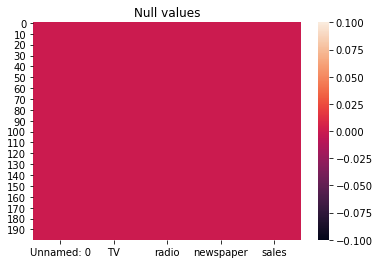

In [20]:
sns.heatmap(sales.isnull())
plt.title("Null values")
plt.show()

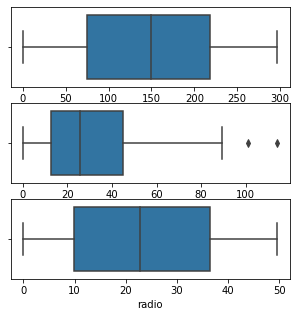

In [30]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(sales['TV'], ax = axs[0])
plt2 = sns.boxplot(sales['newspaper'], ax = axs[1])
plt3 = sns.boxplot(sales['radio'], ax = axs[2])

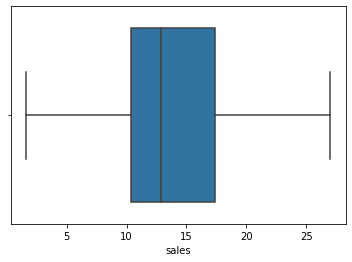

In [28]:
sns.boxplot(sales['sales'])
plt.show()

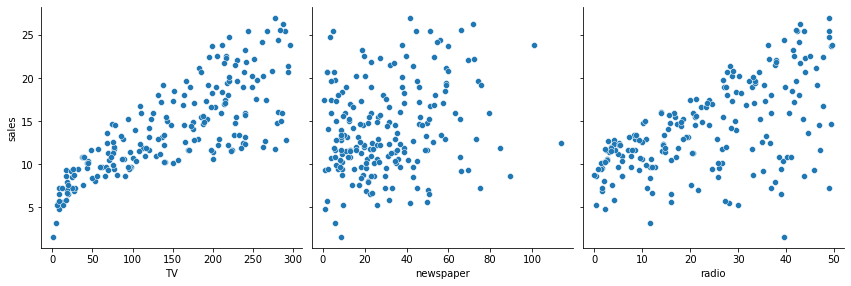

In [31]:
sns.pairplot(sales, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

In [36]:
sales = sales.drop(['Unnamed: 0'], axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

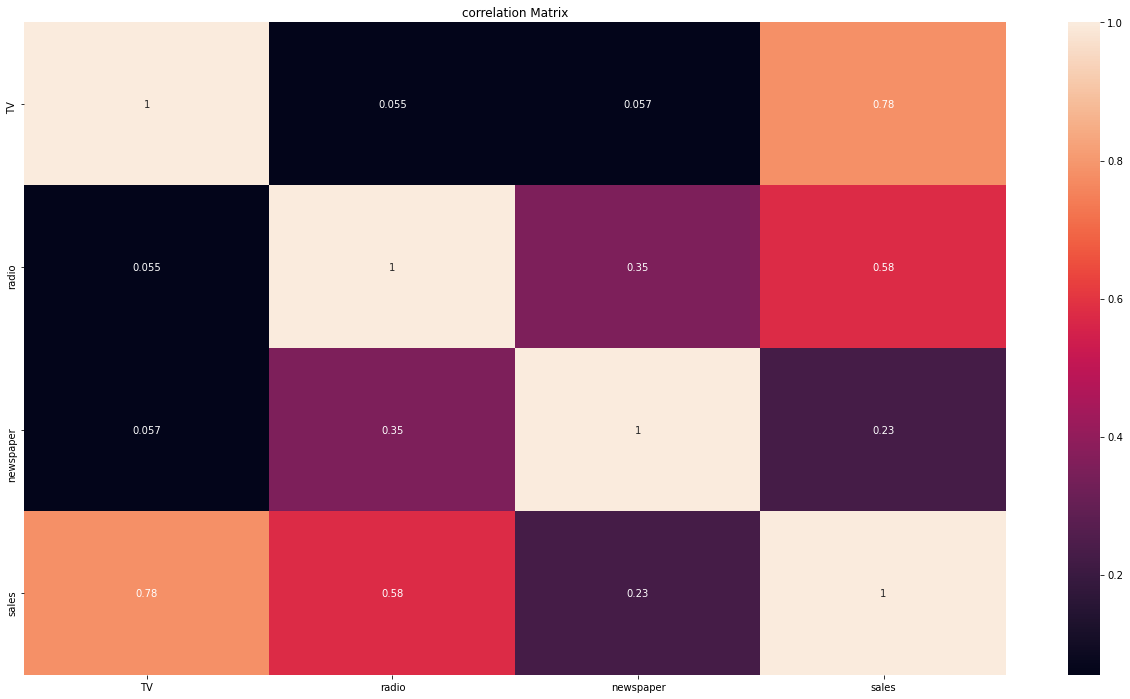

In [37]:
corr_mat=sales.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show

In [38]:
print(sales.corr())

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


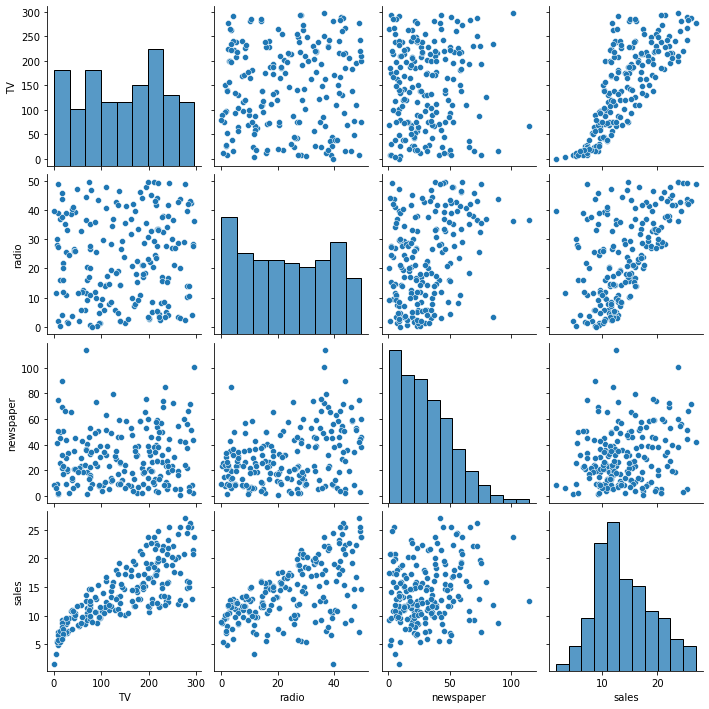

In [39]:
sns.pairplot(sales)

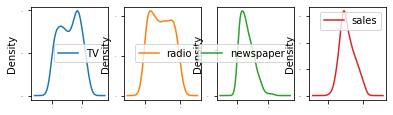

In [40]:
sales.plot(kind='density' , subplots=True, layout=(6,11), sharex=False, fontsize=1, figsize=(18,12))
plt.show()

Text(0, 0.5, 'TV')

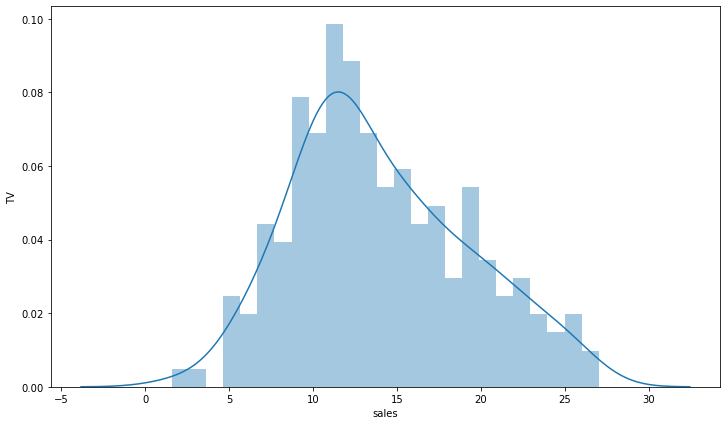

In [41]:
plt.figure(figsize=(12,7))
sns.distplot(sales.sales, bins = 25)
plt.xlabel("sales")
plt.ylabel("TV")

Text(0, 0.5, 'radio')

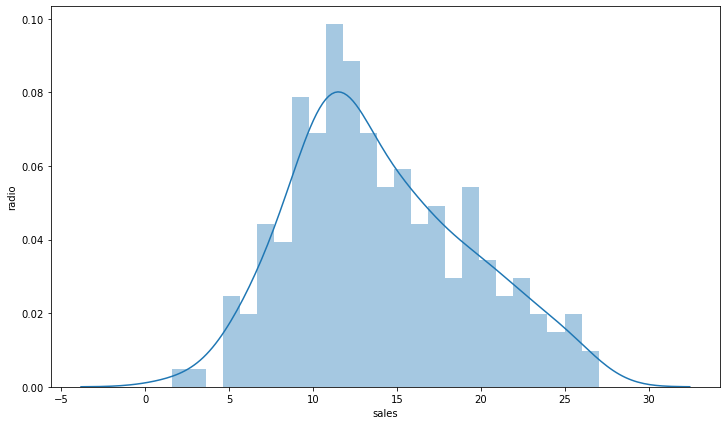

In [42]:
plt.figure(figsize=(12,7))
sns.distplot(sales.sales, bins = 25)
plt.xlabel("sales")
plt.ylabel("radio")

Text(0, 0.5, 'newspaper')

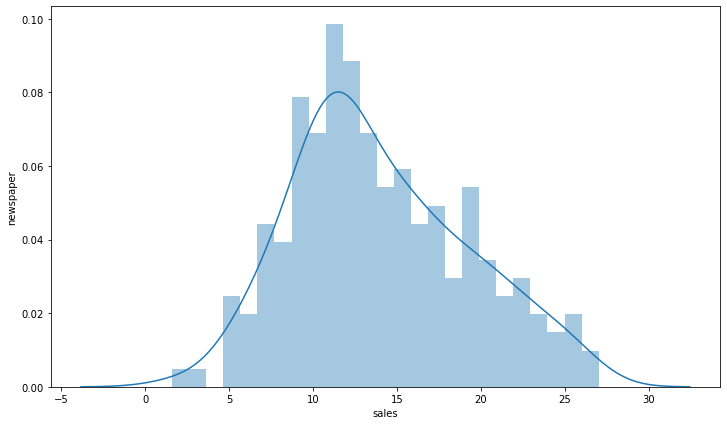

In [43]:
plt.figure(figsize=(12,7))
sns.distplot(sales.sales, bins = 25)
plt.xlabel("sales")
plt.ylabel("newspaper")

In [50]:
sales_visualization_nominal=sales[['sales', 'TV', 'radio', 'newspaper']].copy()

In [51]:
sales_visualization_nominal.columns

Index(['sales', 'TV', 'radio', 'newspaper'], dtype='object')

9.7     5
15.9    4
11.7    4
12.9    4
20.7    3
       ..
25.5    1
15.6    1
17.6    1
3.2     1
20.8    1
Name: sales, Length: 121, dtype: int64


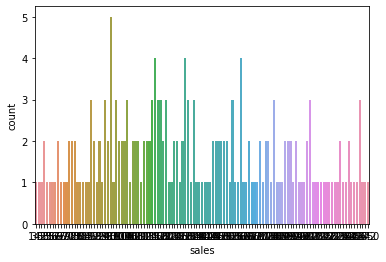

In [52]:
ax = sns.countplot(x="sales", data=sales_visualization_nominal)
print(sales_visualization_nominal["sales"].value_counts())

4.1     3
5.7     3
1.5     2
2.6     2
41.7    2
       ..
14.8    1
8.6     1
11.8    1
45.1    1
36.5    1
Name: radio, Length: 167, dtype: int64


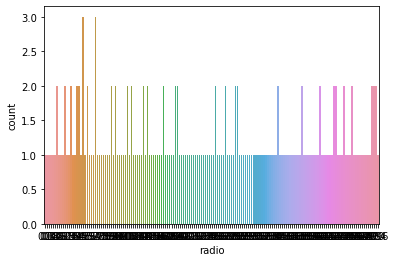

In [53]:
ax = sns.countplot(x="radio", data=sales_visualization_nominal)
print(sales_visualization_nominal["radio"].value_counts())

76.4     2
17.2     2
240.1    2
197.6    2
184.9    2
        ..
117.2    1
289.7    1
137.9    1
220.5    1
13.1     1
Name: TV, Length: 190, dtype: int64


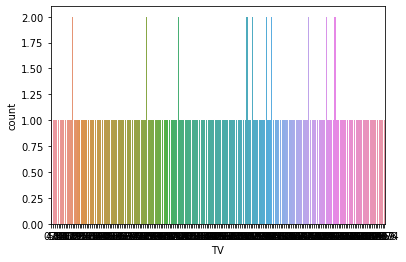

In [54]:
ax = sns.countplot(x="TV", data=sales_visualization_nominal)
print(sales_visualization_nominal["TV"].value_counts())

25.6    3
9.3     3
8.7     3
7.4     2
22.9    2
       ..
2.4     1
13.8    1
1.8     1
57.6    1
19.4    1
Name: newspaper, Length: 172, dtype: int64


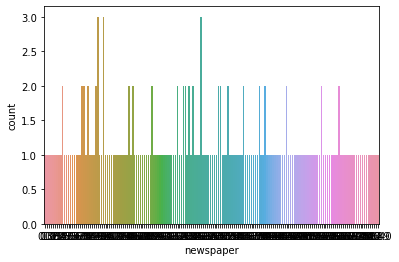

In [55]:
ax = sns.countplot(x="newspaper", data=sales_visualization_nominal)
print(sales_visualization_nominal["newspaper"].value_counts())

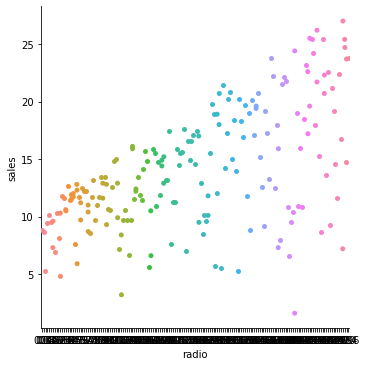

In [56]:
sns.catplot(x="radio", y="sales", data=sales)

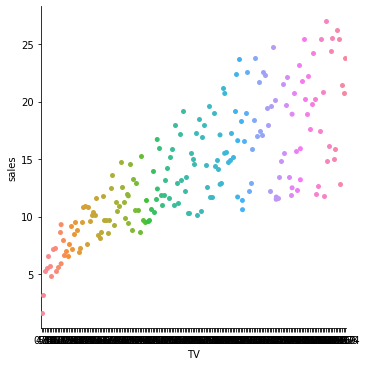

In [58]:
sns.catplot(x="TV", y="sales", data=sales)

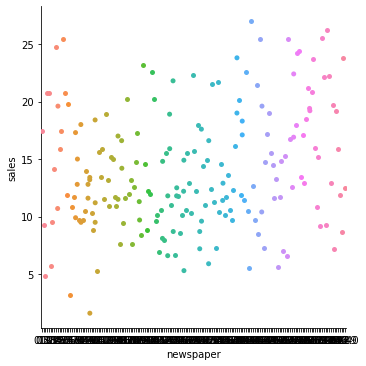

In [59]:
sns.catplot(x="newspaper", y="sales", data=sales)

In [63]:
sales.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [ ]:
#newspaper

<AxesSubplot:>

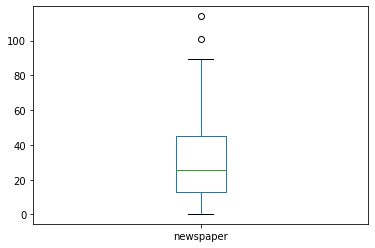

In [66]:
sales['newspaper'].plot.box()

In [67]:
sales.shape

(200, 4)

In [68]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(sales))
threshold=3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [69]:
sales_new_z=sales[(z<3).all(axis=1)]
sales_new_z

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [70]:
sales_new_z.shape

(198, 4)

In [71]:
Data_loss=((200-198)/200)*100

In [72]:
Data_loss

1.0

<AxesSubplot:>

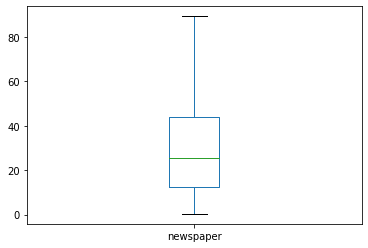

In [74]:
sales_new_z['newspaper'].plot.box()

In [76]:
features=sales.drop("sales",axis=1)
target=sales["sales"]

In [77]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [78]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is :- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.9067114990146383
At random state 0, the testing accuracy is :- 0.8601145185017868


At random state 1,the training accuracy is:- 0.8959372632325174
At random state 1, the testing accuracy is :- 0.8927605914615384


At random state 2,the training accuracy is:- 0.9151707412454462
At random state 2, the testing accuracy is :- 0.7575894500772717


At random state 3,the training accuracy is:- 0.8930288385772915
At random state 3, the testing accuracy is :- 0.9138375011080566


At random state 4,the training accuracy is:- 0.8911672911176578
At random state 4, the testing accuracy is :- 0.9085774752313167


At random state 5,the training accuracy is:- 0.8956962280033929
At random state 5, the testing accuracy is :- 0.8984204533332627


At random state 6,the training accuracy is:- 0.8915418760966582
At random state 6, the testing accuracy is :- 0.922433347392203


At random state 7,the training accuracy is:- 0.8929164670647455
At random state 7, t

In [79]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [80]:
lr.fit(features_train,target_train)

LinearRegression()

In [81]:
pred_test=lr.predict(features_test)

In [82]:
print(r2_score(target_test,pred_test))

0.9125583321991082


In [88]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross forld {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross forld 2 the cv score is 0.8908473589845056 and accuracy score for training is -1.0998635836807016 and accuracy for the cv score is 0.8908473589845056 and accuracy score for training is -1.0998635836807016 and accuracy for the testing is 0.9125583321991082


At cross forld 3 the cv score is 0.8916464591145559 and accuracy score for training is -1.0998635836807016 and accuracy for the cv score is 0.8916464591145559 and accuracy score for training is -1.0998635836807016 and accuracy for the testing is 0.9125583321991082


At cross forld 4 the cv score is 0.8900070660549507 and accuracy score for training is -1.0998635836807016 and accuracy for the cv score is 0.8900070660549507 and accuracy score for training is -1.0998635836807016 and accuracy for the testing is 0.9125583321991082


At cross forld 5 the cv score is 0.8871063495438436 and accuracy score for training is -1.0998635836807016 and accuracy for the cv score is 0.8871063495438436 and accuracy score for training is -1.09

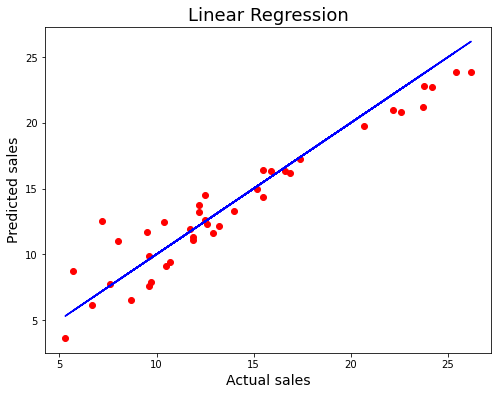

In [89]:
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [92]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [93]:
ls = Lasso(alpha=0.01,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.9125815932021013

In [94]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8871207441185953

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse','mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [96]:
rf= RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 98.55728616819657
Cross Val Score: 97.67001914894935


In [98]:
import pickle
filename = 'sales.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [99]:
loaded_model = pickle.load(open('sales.pkl', 'rb'))
result = loaded_model.score(features_test, target_test)
print(result)

0.9855728616819657


In [100]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=["Predicted","Orginal"])

In [101]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,15.145,8.777,6.908,12.207,13.053,16.915,24.808,9.791,12.687,13.161,...,11.279,25.324,16.457,21.341,6.614,20.802,13.628,22.536,11.474,7.061
Orginal,15.145,8.777,6.908,12.207,13.053,16.915,24.808,9.791,12.687,13.161,...,11.279,25.324,16.457,21.341,6.614,20.802,13.628,22.536,11.474,7.061
